## Taken from [Here](https://qxf2.com/blog/web-scraping-using-python/)

In [1]:
import pandas as pd
import wikipedia as wp
pd.options.mode.chained_assignment = None  # default='warn'
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [2]:
html = wp.page("List of countries by number of military and paramilitary personnel").html().encode("UTF-8")
df = pd.read_html(html)[0]
df.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
df.head()

,0,1,2,3,4,5,6,7
0,Flag,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
1,NaN,Afghanistan[1],174300,0,148700,323000,9.5,5.1
2,NaN,Albania[2],8000,0,500,8500,2.8,2.6
3,NaN,Algeria[3],130000,150000,187200,467200,11.4,3.2
4,NaN,Angola[4],107000,0,10000,117000,4,3.7


In [3]:
df = df.drop(0, 1)
df.head()

,1,2,3,4,5,6,7
0,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
1,Afghanistan[1],174300,0,148700,323000,9.5,5.1
2,Albania[2],8000,0,500,8500,2.8,2.6
3,Algeria[3],130000,150000,187200,467200,11.4,3.2
4,Angola[4],107000,0,10000,117000,4,3.7


In [4]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
1,Afghanistan[1],174300,0,148700,323000,9.5,5.1
2,Albania[2],8000,0,500,8500,2.8,2.6
3,Algeria[3],130000,150000,187200,467200,11.4,3.2
4,Angola[4],107000,0,10000,117000,4,3.7
5,Antigua and Barbuda[5],180,80,0,260,2.7,1.9


In [5]:
df['Country'] = df['Country'].str.replace("\[.*$", '')
df.head()

,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
1,Afghanistan,174300,0,148700,323000,9.5,5.1
2,Albania,8000,0,500,8500,2.8,2.6
3,Algeria,130000,150000,187200,467200,11.4,3.2
4,Angola,107000,0,10000,117000,4,3.7
5,Antigua and Barbuda,180,80,0,260,2.7,1.9


In [6]:
 df.dtypes

0
Country                    object
Active military            object
Reserve military           object
Paramilitary               object
Total                      object
Per 1000 capita(total)     object
Per 1000 capita(active)    object
dtype: object

In [7]:

df['Per 1000 capita(total)'] = df['Per 1000 capita(total)'].str.replace(".", '.')
df['Per 1000 capita(active)'] = df['Per 1000 capita(active)'].str.replace(".", '.')
df.dropna(subset=["Active military"], axis = 0 , inplace= True)
df["Active military"]=df["Active military"].astype(int)
df.dropna(subset=["Reserve military"], axis = 0 , inplace= True)
df["Reserve military"]=df["Reserve military"].astype(int)
df.dropna(subset=["Paramilitary"], axis = 0 , inplace= True)
df["Paramilitary"]=df["Paramilitary"].astype(int)
df.dropna(subset=["Total"], axis = 0 , inplace= True)
df["Total"]=df["Total"].astype(int)
df.dropna(subset=["Per 1000 capita(total)"], axis = 0 , inplace= True)
df["Per 1000 capita(total)"]=df["Per 1000 capita(total)"].astype(float)
df.dropna(subset=["Per 1000 capita(active)"], axis = 0 , inplace= True)
df["Per 1000 capita(active)"]=df["Per 1000 capita(active)"].astype(float)
print(df.shape)
df.head()


(172, 7)


,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
1,Afghanistan,174300,0,148700,323000,9.5,5.1
2,Albania,8000,0,500,8500,2.8,2.6
3,Algeria,130000,150000,187200,467200,11.4,3.2
4,Angola,107000,0,10000,117000,4.0,3.7
5,Antigua and Barbuda,180,80,0,260,2.7,1.9


0          Country  Active military  Reserve military  Paramilitary    Total  \
34           China          2035000            510000        660000  3205000   
70           India          1395100           2096000       1585950  5077050   
165  United States          1348400            857950             0  2206350   
114    North Korea          1280000           6300000        189000  7769000   
130         Russia           900000           2000000        554000  3454000   
117       Pakistan           653800            550000        482000  1685800   
142    South Korea           625000           6100000          9000  6734000   
72            Iran           523000            350000         40000   913000   
169        Vietnam           482000           5000000         40000  5522000   
47           Egypt           438500            479000        397000  1314500   

0    Per 1000 capita(total)  Per 1000 capita(active)  
34                      2.3                      1.5  
70       

<BarContainer object of 10 artists>

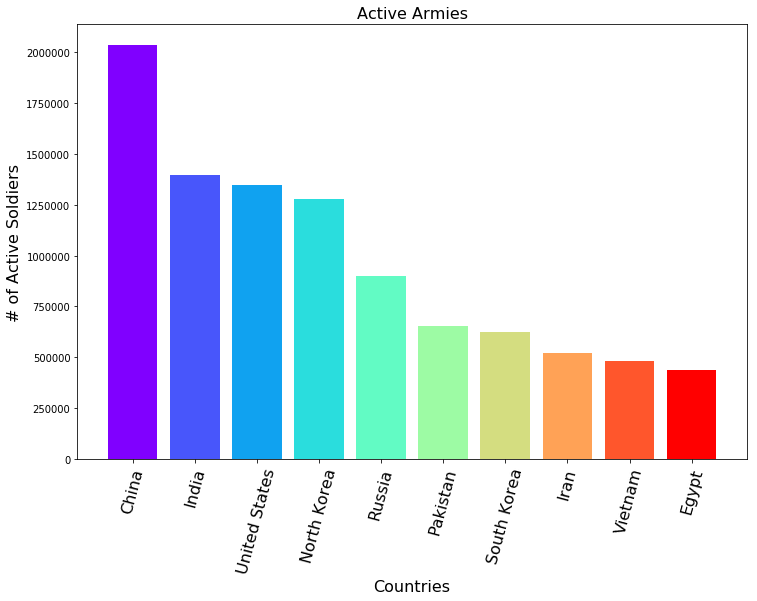

In [8]:
df1 = df.sort_values('Active military', ascending = False).head(10)
print(df1.head(10))
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Active Armies',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('# of Active Soldiers',fontsize=16)
plt.bar(df1['Country'],
        df1['Active military'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

In [9]:
df1.dtypes

0
Country                     object
Active military              int32
Reserve military             int32
Paramilitary                 int32
Total                        int32
Per 1000 capita(total)     float64
Per 1000 capita(active)    float64
dtype: object

<BarContainer object of 10 artists>

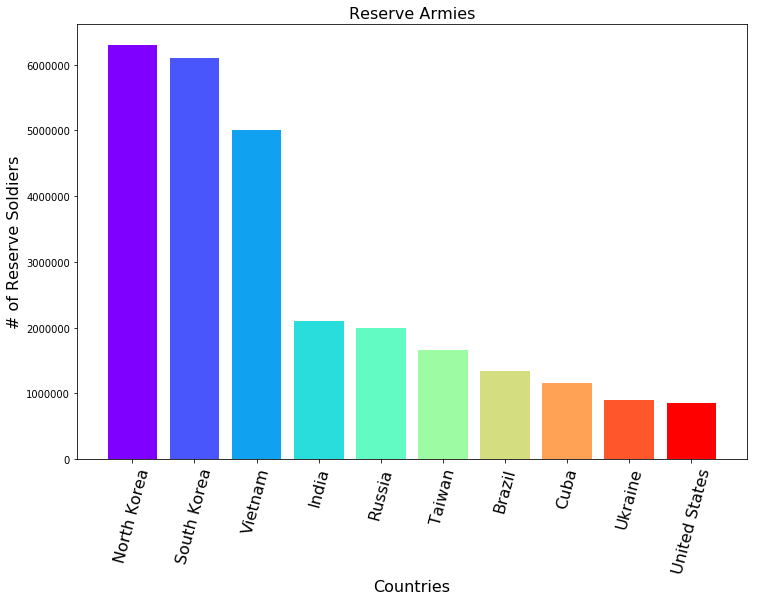

In [10]:
df1 = df.sort_values('Reserve military', ascending = False).head(10)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Reserve Armies',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('# of Reserve Soldiers',fontsize=16)
plt.bar(df1['Country'],
        df1['Reserve military'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

<BarContainer object of 10 artists>

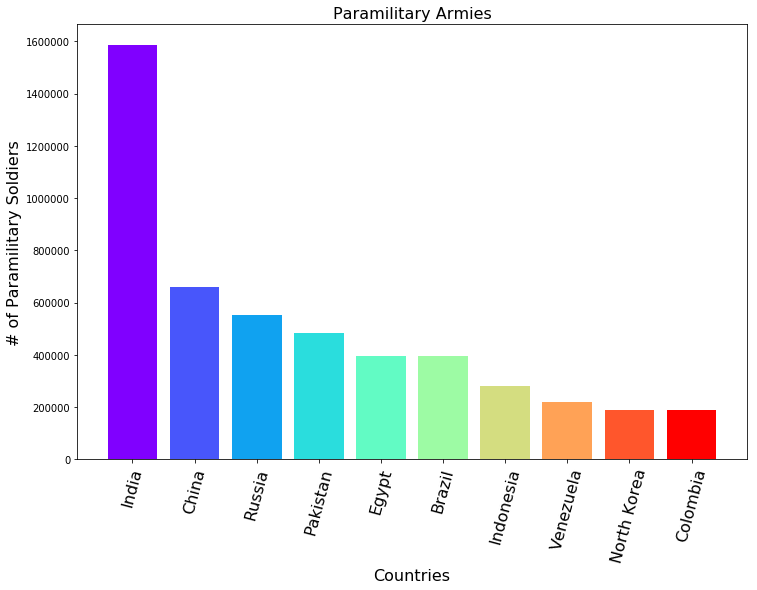

In [11]:
df1 = df.sort_values('Paramilitary', ascending = False).head(10)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Paramilitary Armies',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('# of Paramilitary Soldiers',fontsize=16)
plt.bar(df1['Country'],
        df1['Paramilitary'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

<BarContainer object of 10 artists>

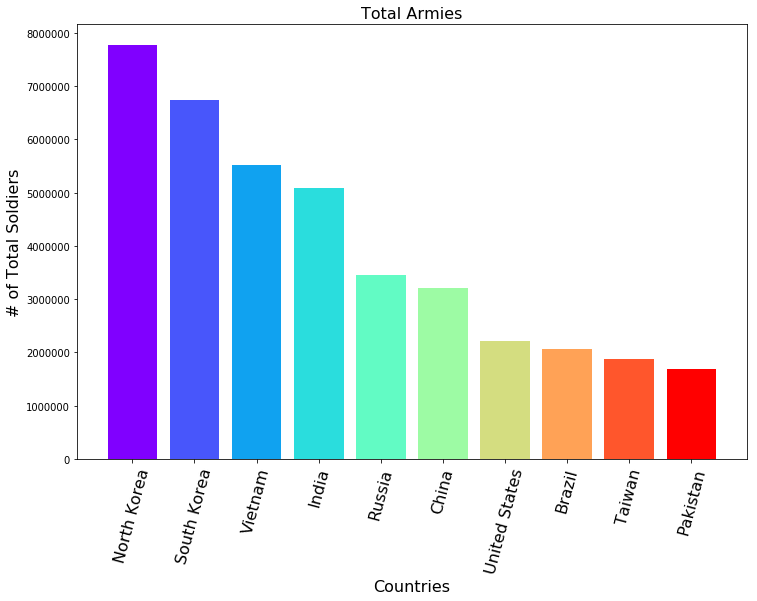

In [12]:
df1 = df.sort_values('Total', ascending = False).head(10)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Total Armies',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('# of Total Soldiers',fontsize=16)
plt.bar(df1['Country'],
        df1['Total'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

<BarContainer object of 10 artists>

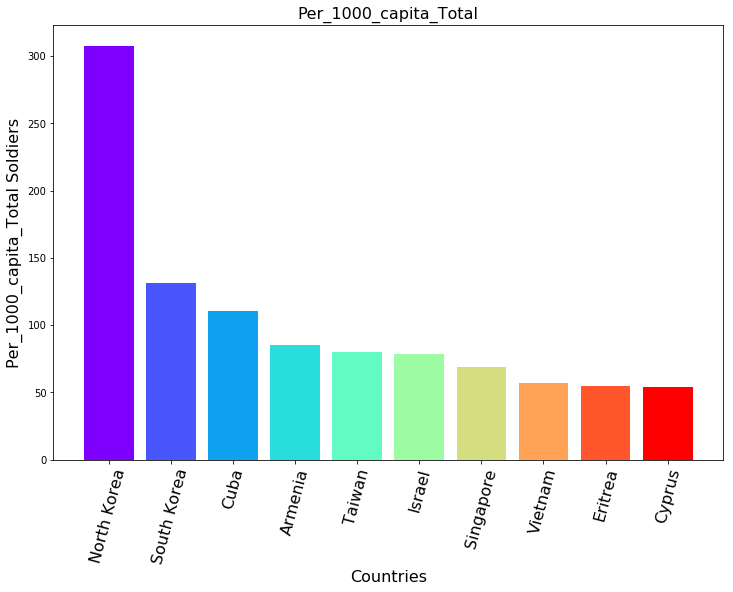

In [13]:
df1 = df.sort_values('Per 1000 capita(total)', ascending = False).head(10)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Per_1000_capita_Total',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('Per_1000_capita_Total Soldiers',fontsize=16)
plt.bar(df1['Country'],
        df1['Per 1000 capita(total)'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

<BarContainer object of 10 artists>

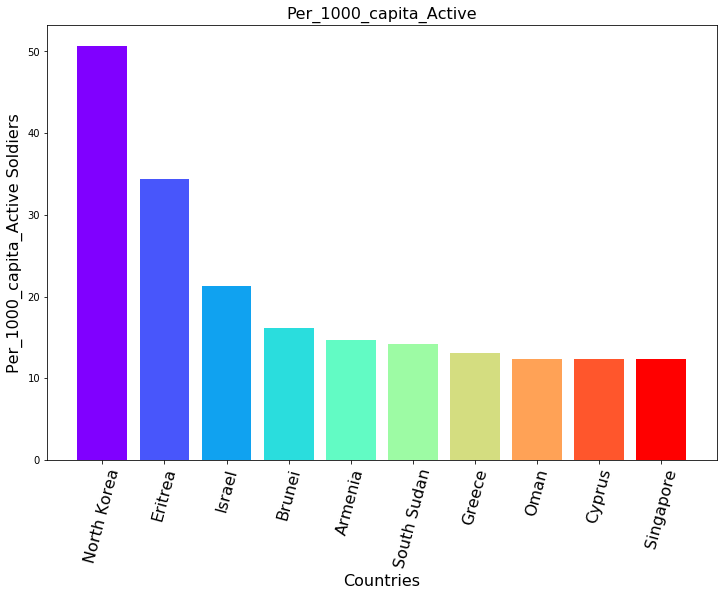

In [14]:
df1 = df.sort_values('Per 1000 capita(active)', ascending = False).head(10)
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Per_1000_capita_Active',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('Per_1000_capita_Active Soldiers',fontsize=16)
plt.bar(df1['Country'], df1['Per 1000 capita(active)'], color = cm.rainbow(np.linspace(0, 1, len(df1))))

In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
soup = BeautifulSoup(requests.get('https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification').text)

In [16]:
e = [tr.text.split("\n\n") for tr in soup.find('table',{'class':'wikitable sortable'}).findAll('tr')]
df2 = pd.DataFrame(e[1:],columns=[x.replace('\n','') for x in e[0]])
df2[df2.columns.values] = df2[df2.columns.values].replace('\n','',regex=True)
print(df2.shape)
print(df2.Region.unique())
df2.head()

(258, 3)
['Europe' 'Arab States' 'Asia & Pacific' 'South/Latin America' 'Africa'
 'North America' 'Unknown']


,Country,Region,Global South
0,Andorra,Europe,Global North
1,United Arab Emirates,Arab States,Global South
2,Afghanistan,Asia & Pacific,Global South
3,Antigua and Barbuda,South/Latin America,Global South
4,Anguilla,South/Latin America,Global South


In [17]:
left = df
right = df2
df3=pd.merge(left, right, on='Country')
print(df3.head())
df4=df3.groupby('Region')
df4

               Country  Active military  Reserve military  Paramilitary  \
0          Afghanistan           174300                 0        148700   
1              Albania             8000                 0           500   
2              Algeria           130000            150000        187200   
3               Angola           107000                 0         10000   
4  Antigua and Barbuda              180                80             0   

    Total  Per 1000 capita(total)  Per 1000 capita(active)  \
0  323000                     9.5                      5.1   
1    8500                     2.8                      2.6   
2  467200                    11.4                      3.2   
3  117000                     4.0                      3.7   
4     260                     2.7                      1.9   

                Region  Global South  
0       Asia & Pacific  Global South  
1               Europe  Global North  
2          Arab States  Global South  
3               Afri

In [18]:
df5=df4.sum()
df5

,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
Region,,,,,,
Africa,1205270,148050,211250,1564570,136.4,101.9
Arab States,1563100,1167700,906110,3636910,208.2,106.2
Asia & Pacific,7585900,11806100,3858890,23250890,431.7,113.0
Europe,2445620,3812290,1056300,7314210,658.6,179.2
North America,1411400,887950,4500,2303850,9.5,6.0
South/Latin America,1561430,3270560,1191600,6023590,291.1,79.7


In [19]:
print(df5.index)
df5.reset_index(inplace=True)
df5

Index(['Africa', 'Arab States', 'Asia & Pacific', 'Europe', 'North America',
       'South/Latin America'],
      dtype='object', name='Region')


,Region,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
0,Africa,1205270,148050,211250,1564570,136.4,101.9
1,Arab States,1563100,1167700,906110,3636910,208.2,106.2
2,Asia & Pacific,7585900,11806100,3858890,23250890,431.7,113.0
3,Europe,2445620,3812290,1056300,7314210,658.6,179.2
4,North America,1411400,887950,4500,2303850,9.5,6.0
5,South/Latin America,1561430,3270560,1191600,6023590,291.1,79.7


<BarContainer object of 6 artists>

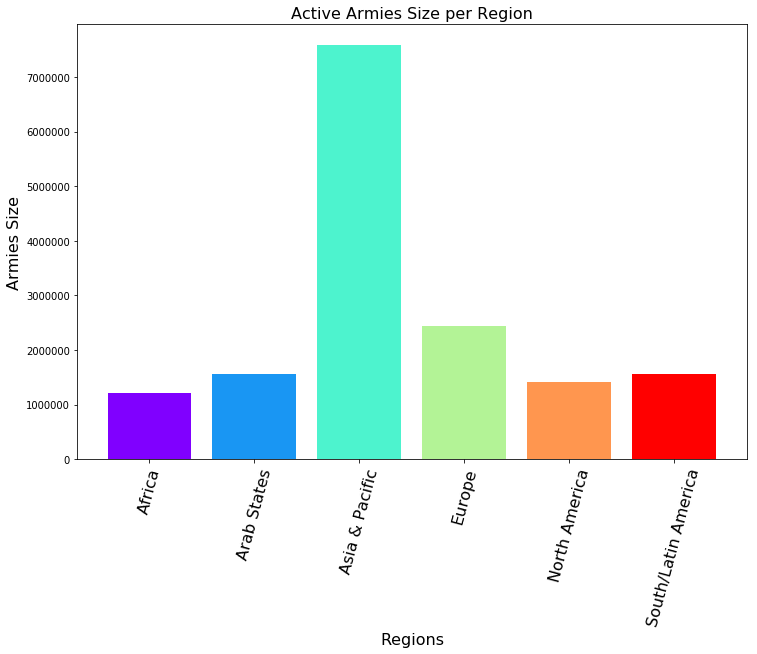

In [20]:
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Active Armies Size per Region',fontsize=16)
plt.xlabel('Regions',fontsize=16)
plt.ylabel('Armies Size',fontsize=16)
plt.bar(df5['Region'], df5['Active military'], color = cm.rainbow(np.linspace(0, 1, len(df5))))

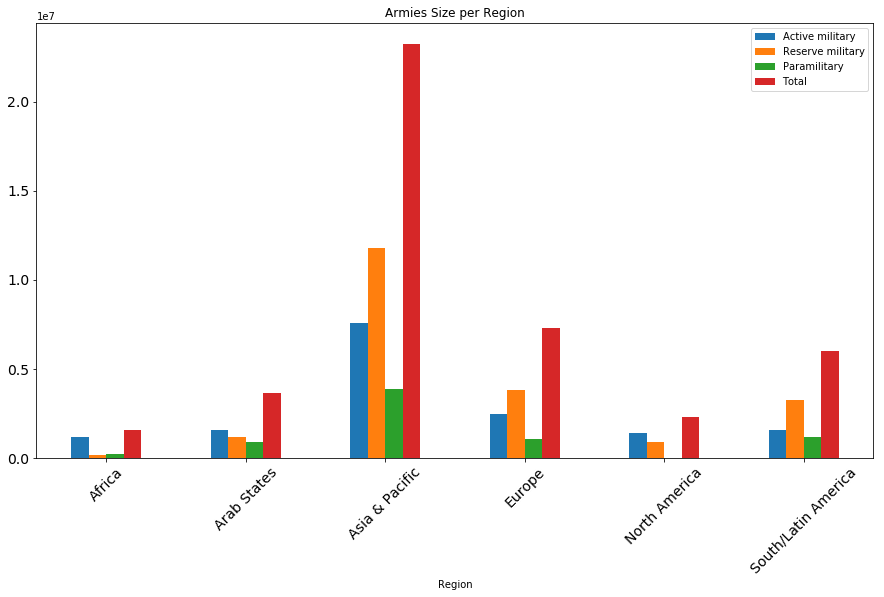

In [21]:
df5[["Region", "Active military", "Reserve military", "Paramilitary",'Total']].plot(x="Region", kind="bar", figsize=(15,8),title ='Armies Size per Region', rot =45,fontsize= 14)

In [22]:
df6=df3.groupby('Global South')
df7=df6.sum()
df7

,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
Global South,,,,,,
Global North,4143670,5349640,898190,10391500,661.3,184.9
Global South,11629050,15743010,6330460,33702520,1074.2,401.1


In [23]:
print(df7.index)
df7.reset_index(inplace=True)
df7 = df7.rename(columns={'Global South': 'Hemisphere'})
print(df7.index)
df7

Index(['Global North', 'Global South'], dtype='object', name='Global South')
RangeIndex(start=0, stop=2, step=1)


,Hemisphere,Active military,Reserve military,Paramilitary,Total,Per 1000 capita(total),Per 1000 capita(active)
0,Global North,4143670,5349640,898190,10391500,661.3,184.9
1,Global South,11629050,15743010,6330460,33702520,1074.2,401.1


<BarContainer object of 2 artists>

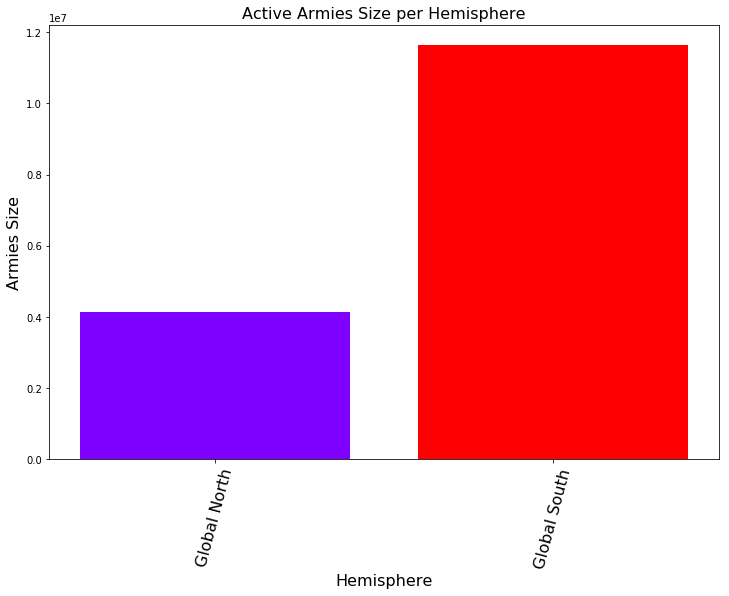

In [24]:
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = '75',fontsize=16)
plt.title('Active Armies Size per Hemisphere',fontsize=16)
plt.xlabel('Hemisphere',fontsize=16)
plt.ylabel('Armies Size',fontsize=16)
plt.bar(df7['Hemisphere'], df7['Active military'], color = cm.rainbow(np.linspace(0, 1, len(df7))))

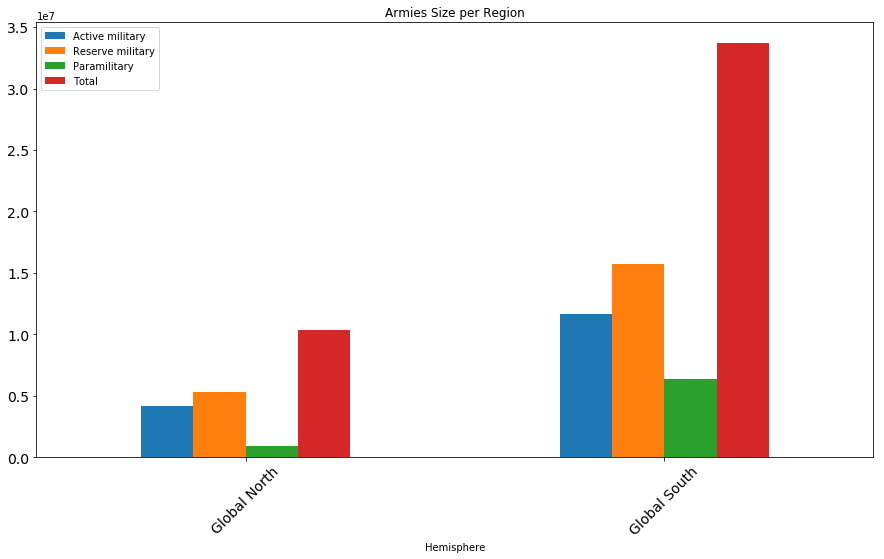

In [25]:
df7[["Hemisphere", "Active military", "Reserve military", "Paramilitary",'Total']].plot(x="Hemisphere", kind="bar", figsize=(15,8),title ='Armies Size per Region', rot =45,fontsize= 14)